In [6]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [7]:
def read_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

## Prepare Dataset

In [47]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
# pcap_file.append("caida0517-500w_10_.pcap")
# pcap_file.append("caida0517-250w_10_.pcap")
# pcap_file.append("caida0517-125w_10_.pcap")
# pcap_file.append("caida0816-600w_10_.pcap")
# pcap_file.append("caida0816-300w_10_.pcap")
# pcap_file.append("caida0816-150w_10_.pcap")
# pcap_file.append("zipf2a-150w_10_.pcap") 
# pcap_file.append("zipf2a-75w_10_.pcap") 
# pcap_file.append("zipf2a-35w_10_.pcap") 
# pcap_file.append("zipf2b-400w_10_.pcap") 
# pcap_file.append("zipf2b-200w_10_.pcap") 
# pcap_file.append("zipf2b-100w_10_.pcap") 

# pcap_file.append("zipf4-60w_10_.pcap")
# pcap_file.append("zipf4-30w_10_.pcap")
# pcap_file.append("zipf4-15w_10_.pcap")


# # # same dist, caida
# for a in caida0517:
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # same dist, zipf
# for a in zipf2a:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf2b:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, caida + zipf2a
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf2b
# for a in caida0517:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf4
# for a in caida0517:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, zipf2a + caida
# for a in zipf2a:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
# for a in zipf2b:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf4 + caida
# for a in zipf4:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # # diff dist, zipf 2a + zipf4
# for a in zipf2a:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, zipf 2b + zipf4
# for a in zipf2b:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
            
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_6_zipf2a-150w_4.pcap', 'caida0517-500w_6_zipf2a-75w_4.pcap', 'caida0517-500w_6_zipf2a-35w_4.pcap', 'caida0517-250w_6_zipf2a-150w_4.pcap', 'caida0517-250w_6_zipf2a-75w_4.pcap', 'caida0517-250w_6_zipf2a-35w_4.pcap', 'caida0517-125w_6_zipf2a-150w_4.pcap', 'caida0517-125w_6_zipf2a-75w_4.pcap', 'caida0517-125w_6_zipf2a-35w_4.pcap', 'caida0816-600w_6_zipf2a-150w_4.pcap', 'caida0816-600w_6_zipf2a-75w_4.pcap', 'caida0816-600w_6_zipf2a-35w_4.pcap', 'caida0816-300w_6_zipf2a-150w_4.pcap', 'caida0816-300w_6_zipf2a-75w_4.pcap', 'caida0816-300w_6_zipf2a-35w_4.pcap', 'caida0816-150w_6_zipf2a-150w_4.pcap', 'caida0816-150w_6_zipf2a-75w_4.pcap', 'caida0816-150w_6_zipf2a-35w_4.pcap']
Total Pcap File Number: 18


In [9]:
def prepare_profiler_bins():
    res = {}
    
    profiler_path = "../traffic_generator/fs_dist/"
    profiler_fsd = []
    for file in sorted(os.listdir(profiler_path)):
        profiler_fsd.append(file)
        
    for file in profiler_fsd:
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
                
        # calcualte CDF
        cdf = {}
        culmulative_prob = 0.0
        for fs, freq in sorted(fsd.items()):
            culmulative_prob += (freq/fn)
            cdf[fs] = culmulative_prob
            
        # get bins
        bin = {}
        idx = 0
        for fs, prob in sorted(cdf.items()):
            while idx < round(prob * 100):
                bin[idx] = fs
                idx += 1
                
        res[file[:-4]] = bin
            
    return res
    
# prepare_profiler_bins()

In [24]:
def plot_mrd_variation(mrd_var, name, window_size=200, typ='Var'):
    
    res = []
    
    res.append(mrd_var)
    
    print(name)
    print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=f'MRD {typ}')

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('MRD')
    plt.title('%s MRD Variation' % (name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [39]:
def changes_occured(sec_var, n, ws=20):
    
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window           
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (4+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (4 + sec_var.index(val) - 1)/5
        
    sec_var_hit = 0
    
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return sec_var_hit, time_sec_var, val, max_time
    
    

In [12]:
def calculate_mrd(fsd1, fsd2):
    
    MRD_nom = 0
    MRD_denom = 0
    for key in fsd1.keys():
        true = fsd1[key]
        if key in fsd2.keys():
            est = fsd2[key]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [45]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 100
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None, None] # 0, 1
            res_mrd_var[name] = [None, None, None] # 0, 1, 2
            res_mrd_sec_var[name] = [None, None, None, None] # 0, 1, 2, 3
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
            for i in range(1, len(fsd_total)):
                res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                
            # print(len(res_fsd[name]), len(res_mrd[name]), res_mrd[name])
                
            # plot_mrd_variation(res_mrd[name], d[:-5], window_size, 'MRD')
                
            for i in range(3, len(res_mrd[name])):
                res_mrd_var[name].append(abs(res_mrd[name][i] - res_mrd[name][i-1]))
                
            # plot_mrd_variation(res_mrd_var[name], d[:-5], window_size, 'Var')
                
            for i in range(4, len(res_mrd_var[name])):
                res_mrd_sec_var[name].append(abs(res_mrd_var[name][i] - res_mrd_var[name][i-1]))
                
            plot_mrd_variation(res_mrd_sec_var[name], d[:-5], window_size, 'Sec Var')
            # print(len(res_mrd_var[name]), len(res_mrd_sec_var[name]))

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][4:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_mrd_sec_var[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

caida0517-500w_6_zipf2a-150w_4
[None, None, None, None, 0.09197694263769185, 0.0031062466117003362, 0.058357011628039634, 0.002343390650444921, 0.005852341295332797, 0.01367625455915028, 0.025156867865696875, 0.058639703193786974, 0.01739448727192061, 0.05990242111712196, 0.014058810126921562, 0.0073327921625135906, 0.0011671335200746924, 0.009306460160350083, 0.010824943194242542, 0.029141146046005262, 0.02867044605289415, 0.03663712851722145, 0.04943071499106455, 0.04914188249719964, 0.03474986936253155, 0.025236883298053958, 0.048392434743230295, 0.10592270256347691, 0.029776751963176862, 0.015397223532917725, 0.0058768342112202054, 0.03967778685502921, 0.001456944708457808, 0.02689992607333025, 0.010270459491956263, 0.001444180168311604, 0.007371311267415082, 0.012896745085654193, 0.028511935211063544, 0.02976584006603844, 0.006795198002690683, 0.014911507974263105, 0.02901410085301448, 0.03743580177827521, 0.04998408061293835, 0.02269404426142063, 0.08605110308273323, 0.0346466706

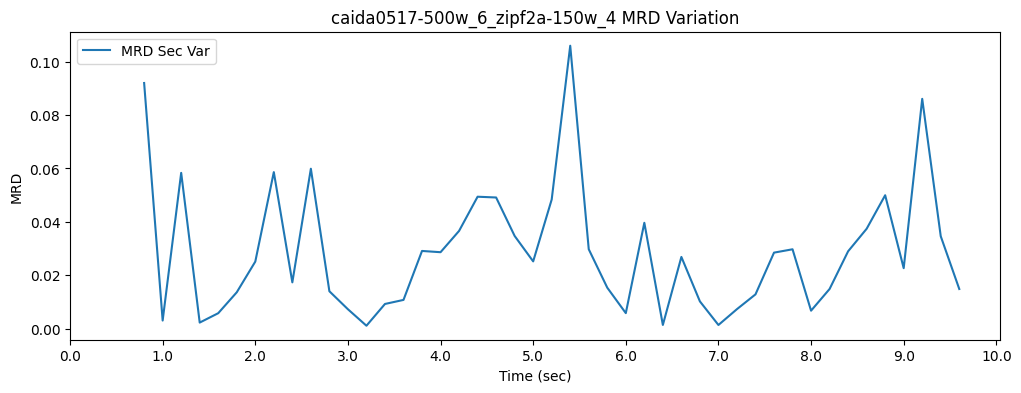

caida0517-500w_6_zipf2a-75w_4
[None, None, None, None, 0.07251869871974997, 0.012329487732100575, 0.017077778377503072, 0.04102017262749946, 0.02899927197014035, 0.02629959545751004, 0.05359833226722871, 0.03614767003888336, 0.0377466730407906, 0.043493019963608215, 0.019198943010256653, 0.01664710023843141, 0.06863804879611163, 0.0022766363323639682, 0.023689456685433874, 0.037576332051258765, 0.023094604047992795, 0.02090437986485638, 0.008014889454192375, 0.0070038820859588125, 0.03861993108335726, 0.010911074740861948, 0.03005759953422782, 0.018193148892237, 0.006719408007883398, 0.004437076539876572, 0.036894825469696135, 0.02683975280062534, 0.04647559842666371, 0.006176453650202474, 0.009088446347380597, 0.03420951925376703, 0.01466414060004384, 0.018668862768585703, 0.018139906574183295, 0.00030821322175489385, 0.0009065176379103868, 2.020700139437892e-05, 0.019883717390642652, 0.004640261241218413, 0.00361198689889497, 0.0027983973774498017, 0.02539806108671583, 0.012287685758

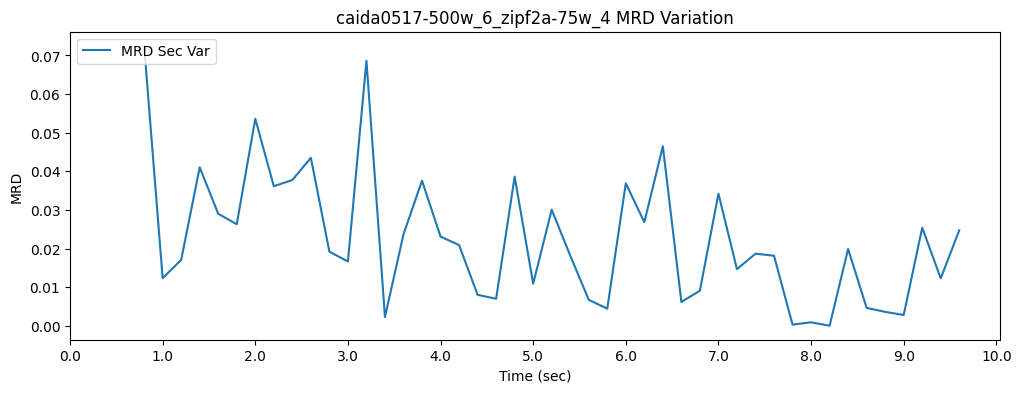

caida0517-500w_6_zipf2a-35w_4
[None, None, None, None, 0.22088723046514636, 0.0050487918260548326, 0.021367281747639633, 0.020846485747499754, 0.014871203312835257, 0.048372668916774164, 0.007914917867900106, 0.002372167897884414, 0.006337475066463094, 0.004203177786912038, 0.0025916699835868418, 0.0007856204369676156, 0.012135131400824561, 0.02226533234811434, 0.009445911163900367, 0.003050509970414339, 0.03736728645347853, 0.04193521873337325, 0.02467389665961983, 0.039658872489918284, 0.026909528827337104, 0.03402609751485064, 0.051256789187823615, 0.025593817974500555, 0.003128106276531928, 0.0018348959190014336, 0.007500667103316205, 0.004947301403384952, 0.02451004414093949, 0.009619067526796532, 0.03766486451907425, 0.01918765956773938, 0.011768477189164961, 0.0014463125645209907, 0.03608165964895793, 0.05527915975677167, 0.019484889495957836, 0.030178927739418993, 0.03348497761346314, 0.004086221695661085, 0.011041158932914796, 0.04156234650745072, 0.01089188753638215, 0.019982

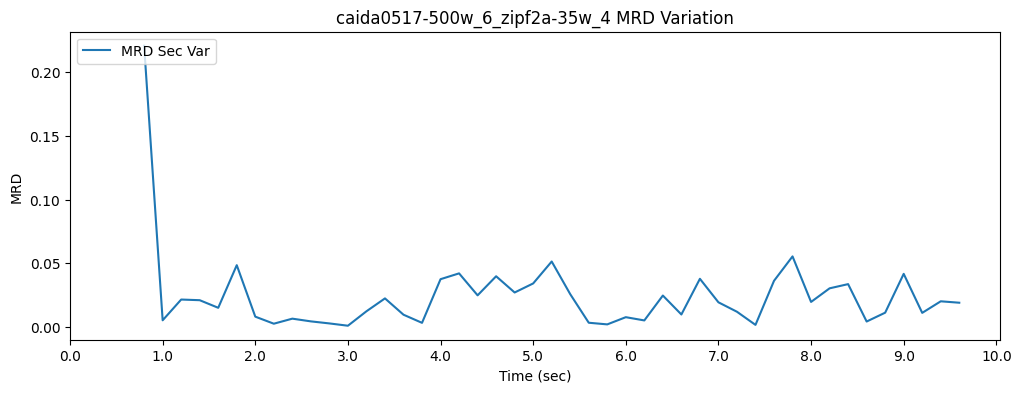

caida0517-250w_6_zipf2a-150w_4
[None, None, None, None, 0.07933835099784364, 0.008969353842405603, 0.03804778191498326, 0.024201168154397212, 0.036092853292117144, 0.03689261279890044, 0.04377325313347702, 0.0008260191783344695, 0.024321868248688316, 0.0170356838935401, 0.013010668628864297, 0.006982190417845202, 0.02838226119331022, 0.004546039276907221, 0.026426070933679824, 0.01120036463782681, 0.030117299849020007, 0.04433337439232543, 0.021056789039893553, 0.01031287018326249, 0.004530022672379397, 0.0005119968289228893, 0.008282819480592452, 0.01285100355551072, 0.008938773401649946, 0.0015803299179992236, 0.012677176885521724, 0.012996596304367058, 0.0012162673700650828, 0.0007171755840822414, 0.0024174690881745287, 0.002039187187914626, 0.06607139815415985, 0.06570068476514868, 0.0041777400675353515, 0.029209974040441233, 0.023826876336850877, 0.04110974443077764, 0.013815507994148102, 0.021930362639732692, 0.03699176266133175, 0.0032617947522122215, 0.013686377368093416, 0.004

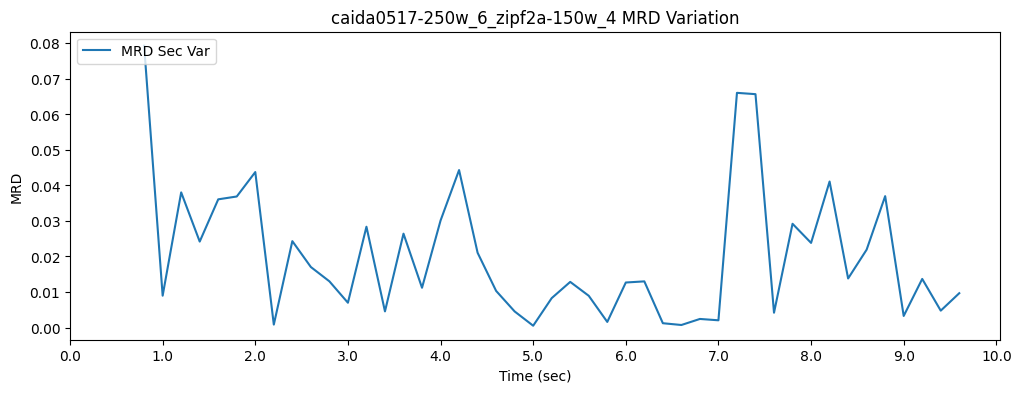

caida0517-250w_6_zipf2a-75w_4
[None, None, None, None, 0.04109326241012767, 0.002714377927473144, 0.05276887576176542, 0.0070700483092676625, 0.04845867010425531, 0.029693300153023516, 0.010164995747116712, 0.01005952891302947, 0.034051557508799735, 0.06801788421446137, 0.07128228142466647, 0.029423540321568853, 0.019950748881330693, 0.017668474579253635, 0.023826298737193052, 0.036282632096911294, 0.0037172623108286396, 0.019048489277879832, 0.03356133953201079, 0.021240591236330653, 0.016686229656765084, 0.01641631252935971, 0.01695339164027715, 0.0035337792258752776, 0.014102894828340373, 0.002105027958569039, 0.02218621683304045, 0.0028762765292930093, 0.056860973466635156, 0.057379167743602966, 0.03699182160953318, 0.014375561545372895, 0.01653484360251284, 0.005115474309787149, 0.026282283248227456, 0.004665462946004562, 0.05515570240917966, 0.04408608786058005, 0.041348087708005576, 0.03145077433646648, 0.039280146028551344, 0.08136869969975302, 0.06598491040128607, 0.0145714552

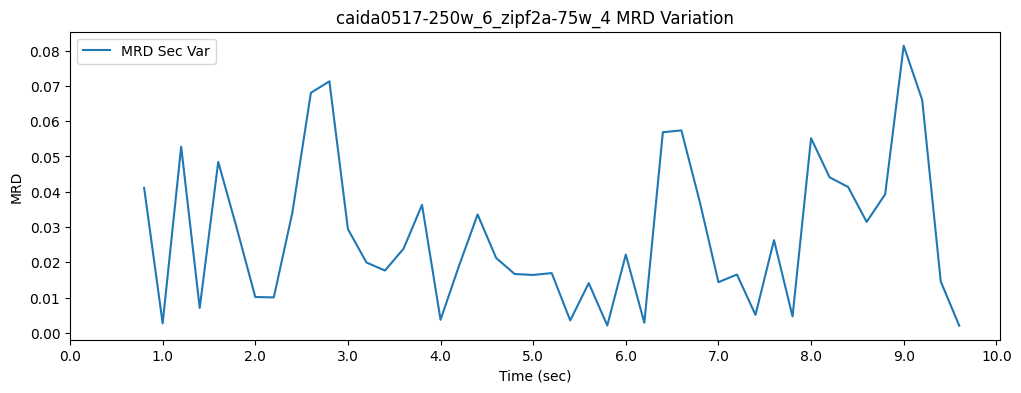

caida0517-250w_6_zipf2a-35w_4
[None, None, None, None, 0.12714301721883986, 0.030472027651339495, 0.0383351924022407, 0.027476461589414414, 0.040856795481284736, 0.019417906006445163, 0.01554799942123225, 0.00367379768324938, 0.01613063974940282, 0.033277261756746834, 0.011308241328837065, 0.02837465564738295, 0.011556352097524425, 0.003972366148531914, 0.023415731932802997, 0.017146326778033294, 0.006118484572014804, 0.06882303191772327, 0.08105019479665143, 0.013830516557870598, 0.045362040309934015, 0.04036768185787326, 0.083677740066887, 0.011956402693363899, 0.09127200720961337, 0.026565718172499586, 0.03472915918546071, 0.04080560217732698, 0.06567102119673451, 0.010868519550135458, 0.01597707378128488, 0.014665927208151963, 0.005899253167117369, 0.009820323932763886, 0.02096726168869223, 0.01824905376456687, 0.020161370786965338, 0.01251560915426464, 0.07243207487840103, 0.010685537779133836, 0.026514662964946645, 0.0554415795434029, 0.003948759353748499, 0.0008018928624369259, 

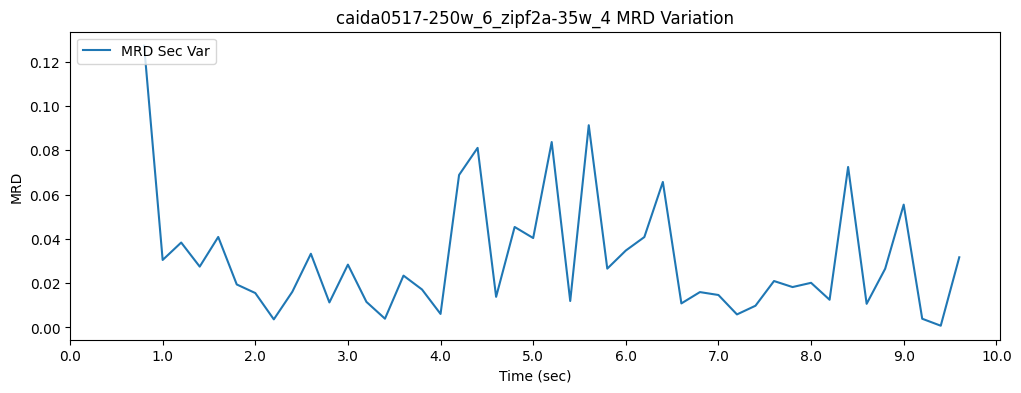

caida0517-125w_6_zipf2a-150w_4
[None, None, None, None, 0.05023662925649447, 0.04407652975030396, 0.034621063270242, 0.04095654099064172, 0.011762461901381693, 0.012064472480414423, 0.021053307855451286, 0.004024517028891894, 0.00022364480775616258, 0.00829130858695809, 0.06781873034281333, 0.029867298037274365, 0.042133364841281384, 0.046777693201192044, 0.03598172143894918, 0.036687382737663754, 0.007429426351501067, 0.015455774567280867, 0.03157764624421738, 0.0024909245385031364, 0.039949098155009244, 0.015352397855160571, 0.020742790459696125, 0.017286259302111362, 0.0037575391651197276, 0.005791101860541492, 0.027389616002339245, 0.026539243077463304, 0.025321363675555375, 0.004197619419055887, 0.0019807862665485176, 0.00958838773296583, 0.002013877079828308, 0.013128248509447604, 0.012521815008726012, 0.012510015490625526, 0.049755927475592765, 0.03337277353014523, 0.002551120788027439, 0.008889915018312655, 0.0006575585048030907, 0.0020296422165581585, 0.0062884580726551564, 0.

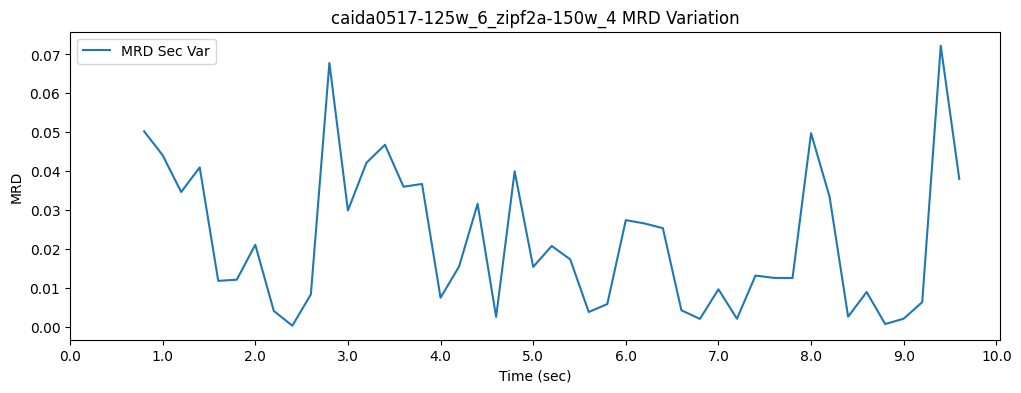

caida0517-125w_6_zipf2a-75w_4
[None, None, None, None, 0.07947693908012876, 0.06703872123466997, 0.021383291301724894, 0.0126038849417201, 0.0212997044817842, 0.007550721450826303, 0.017554118322255285, 0.004705439488048191, 0.019004840552790225, 0.011498568545548371, 0.009297045080844835, 0.00180250193943704, 0.012109618352789897, 0.03231118096837343, 0.03053422025778818, 0.01725305969218044, 0.01062830784616653, 0.021821081560574274, 0.004480676227577085, 0.0015568249169504722, 0.008378179382766693, 0.01294076356622842, 0.02030285067629467, 0.029374346091340098, 0.04622016726728767, 0.020800696257615325, 0.030950091593694107, 0.016712513043891042, 0.007428802847832594, 0.016631146760873072, 0.004799419814931705, 0.002104282463495699, 0.035125583582769515, 0.03492519203059491, 0.013508008971172325, 0.001775133579610233, 0.06364679393725037, 0.011991679767496433, 0.05810995466167879, 0.014028044330928857, 0.018808777429467072, 0.004487478633276365, 0.0031530906206853615, 0.022884283246

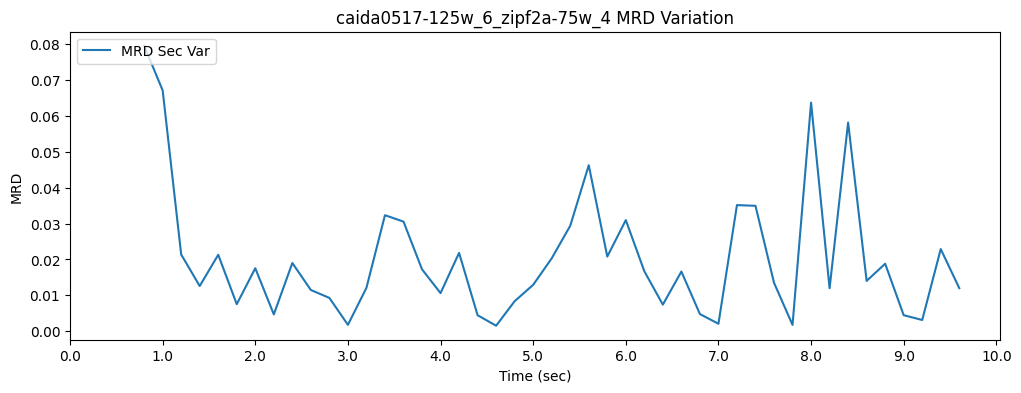

caida0517-125w_6_zipf2a-35w_4
[None, None, None, None, 0.017558788062014552, 0.019342308146171994, 0.04810463612400012, 0.016545389762065044, 0.020297650155433222, 0.010242469964738599, 0.0032133761429394836, 0.07812690269063036, 0.021796759941089816, 0.05319130952815179, 0.06206439998187352, 0.010864206954237399, 0.04670076714356361, 0.0568225524751102, 0.04970226887493559, 0.02747764778554651, 0.007968831586134872, 0.016317097375622258, 0.03318190183874353, 0.03836856863224597, 0.03975131841787083, 0.03797515328266987, 0.012759927804120552, 0.026195419437159306, 0.00017531094838380001, 0.019929768639239287, 1.2780573528214934e-05, 0.00539186625086957, 0.005676803816338727, 0.030695807271543196, 0.02067183462532296, 0.011434174325138158, 0.006973125789193402, 0.020083117374281756, 0.006625136595560854, 0.005620307456926377, 0.009526946317008178, 0.007874267584371708, 0.0032765871068695107, 0.033600532029946006, 0.062057245911406766, 0.023450686791546993, 0.04426461686830224, 0.0316791

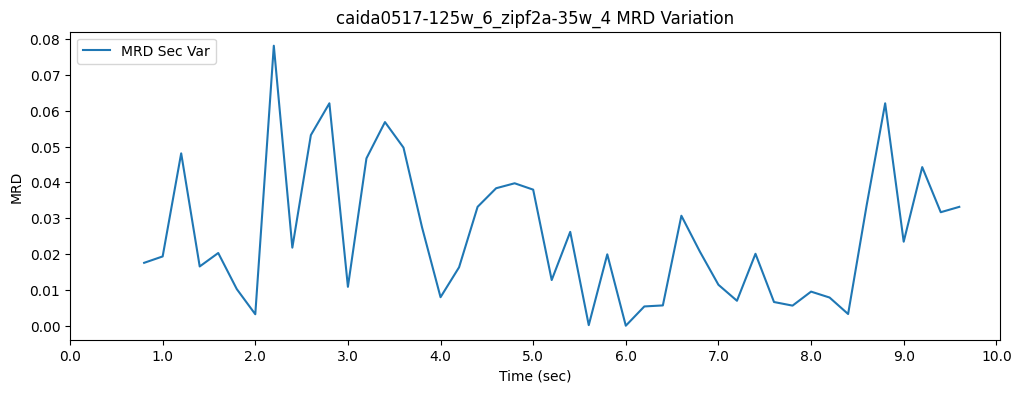

caida0816-600w_6_zipf2a-150w_4
[None, None, None, None, 0.12478434307851188, 0.026575359118260866, 0.003607718411551053, 0.0018789611279668716, 0.10084810034413255, 0.08935089602432006, 0.012580318853381622, 0.0007857277220387759, 0.004296162190899011, 0.05799031378924824, 0.02140106588158719, 0.032651946970390644, 0.025582835225398393, 0.04555047505556675, 0.02876747120965617, 0.004791984130133264, 0.015250544662309351, 0.03056768558951961, 0.010334959777438923, 0.02308383120102797, 0.02932824446586202, 0.02083628694144024, 0.031878316991857725, 0.078279801201532, 0.08040065620798298, 0.009131714177760153, 0.03264361605715027, 0.042219844751398505, 0.04255516099429435, 0.03997531215876182, 0.013689162221777296, 0.016211112729049182, 0.004553215708594127, 0.006709867540931502, 0.0009668686559507478, 0.003509040760736881, 0.015679045655275003, 0.039297879295981164, 0.014339944250925662, 0.024588677298591932, 0.0457433456752433, 0.07930010925399644, 0.014501158636310296, 0.01153549580455

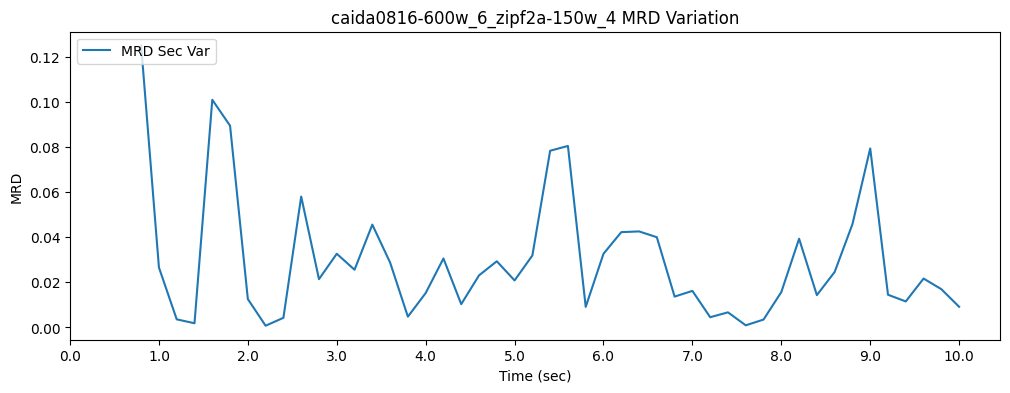

caida0816-600w_6_zipf2a-75w_4
[None, None, None, None, 0.00024172518069093263, 0.05719367881347481, 0.009847595446029367, 0.0071389912631117936, 0.02302213257550112, 0.011342162049399362, 0.01755048230393419, 0.008784417517148868, 0.0022530897398866934, 0.005730323406761939, 0.09450871206997902, 0.11043781507291539, 0.034714815424100265, 0.010591061227093856, 0.032035199577454154, 0.02895364271183687, 0.032856926799758046, 0.0007441624902090327, 0.0007518611311734258, 0.00591109179461391, 0.022751725722022775, 0.004500765372073445, 0.0025434991209691837, 0.0037386637053488103, 0.016645856147325055, 0.004311120623272768, 0.02345264478076725, 0.012896200211053976, 0.009193104721258005, 0.012651508449084248, 0.04003586361174982, 0.007660022961248236, 0.012559956975477404, 0.016835734985055417, 0.028982073249724127, 0.000465513125142647, 0.011245285052960075, 0.012240556168927719, 0.027668340573243855, 0.01386088774073535, 0.0005529746215580111, 0.0209446687358521, 0.016847873152835424, 0.

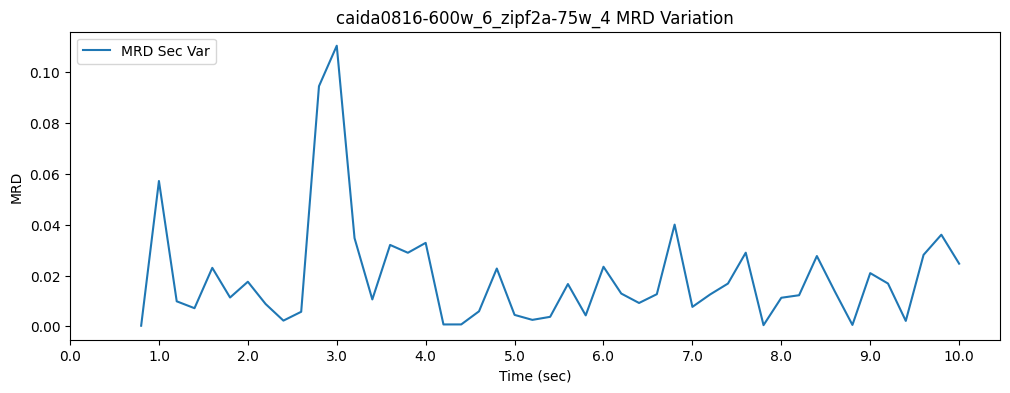

caida0816-600w_6_zipf2a-35w_4
[None, None, None, None, 0.1164364167093791, 0.05603660309919789, 0.002080010021575651, 0.1093446941604782, 0.007030758799673242, 0.002583138922060857, 0.006239387891378179, 0.01976718645172837, 2.914081120175549e-05, 0.07142361170903277, 0.0671348553092661, 0.0009083206428639468, 0.003713527851458953, 0.01848049579691502, 0.01546666666666674, 0.012958696362207922, 0.02189559306704747, 0.014204424523556525, 0.021901003483366877, 0.06270894062554844, 0.047108570829547, 0.022492267474214067, 0.008270793388192144, 0.024185968210322484, 0.06615546017183815, 0.018844251114340738, 0.013385422366648081, 0.029374535792369816, 0.018591078576862152, 0.012476146814154876, 0.029899189770194012, 0.05521500882325625, 0.0030108878345990187, 0.034268056452356754, 0.025220348081360755, 0.00016363551358178352, 0.0361958778281567, 0.016874843512445392, 0.016413151366018508, 0.010036352712753271, 0.01714419707080883, 0.013646962176627198, 0.019023742994181414, 0.0400979639068

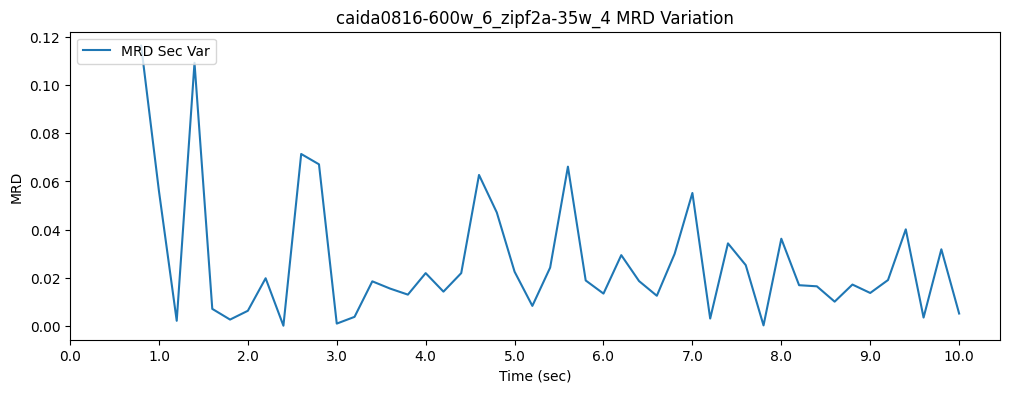

caida0816-300w_6_zipf2a-150w_4
[None, None, None, None, 0.00301611708023819, 0.021437111630912165, 0.001148831468475775, 0.0017306478294081828, 0.003114009800201878, 0.011641616966462265, 7.953572263008635e-05, 0.03531487771859332, 0.028024605332546748, 0.05450990938180811, 0.03978234665177505, 0.02739332692711749, 0.02352983276146592, 0.014505931314137355, 0.014566242046969213, 0.01509644706049218, 0.013656378014852477, 0.008827967917497126, 0.0011191445746419615, 0.035562384666806446, 0.02016305049178857, 0.05231795270887818, 0.06064539550528797, 0.06579553797110949, 0.0016329601274506222, 0.015192075152142936, 0.0008658068493283544, 0.0467815414765127, 0.03096155157471636, 0.012106279273551124, 0.011599909181804202, 0.01492687575926388, 0.010526271085883443, 0.035695966029724024, 0.04438381814561221, 0.006399999999999961, 0.02557400309739366, 0.02706857445680977, 0.03731031588256739, 0.06252913040243357, 0.05793577446590881, 0.044648564434226934, 0.019876404900437183, 0.009385513676

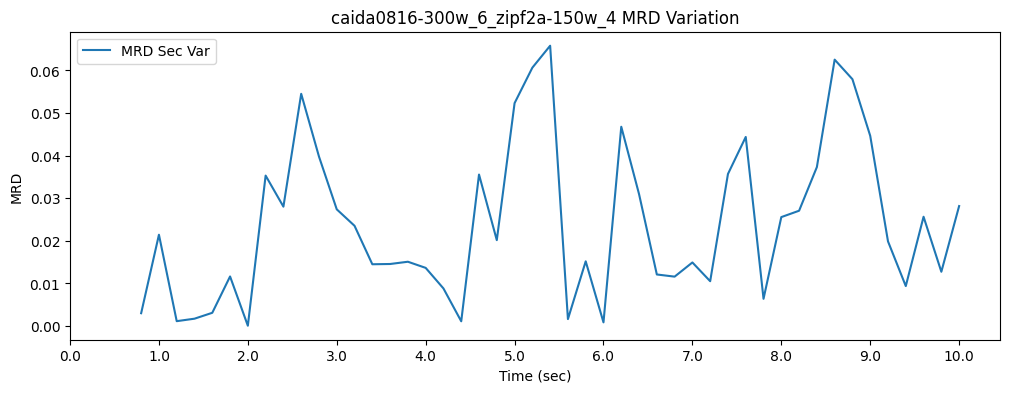

caida0816-300w_6_zipf2a-75w_4
[None, None, None, None, 0.048327723973958514, 0.005452589034984134, 0.0024271380793119413, 0.0075581364516214555, 0.038686445446969975, 0.050084379783233934, 0.055271133995274335, 0.016193602687814224, 0.017411259946618685, 0.011592090809627364, 0.013454851246619215, 0.024028653035317593, 0.021617009912198504, 0.025572770914385812, 0.0593281540649962, 0.03521602973173077, 0.0075267460556239785, 0.03214075519623327, 0.040362047529050205, 0.03206649087714425, 0.03450177396312759, 0.031248290581022964, 0.03001044734979197, 0.06304446261666452, 0.10777936468183325, 0.05337740159040949, 0.03318734593543049, 0.02181663528233313, 0.023974668207169425, 0.023254026995417898, 0.031244080062604818, 0.03056383703877108, 0.013013959832881672, 0.017863899753115753, 0.05130471435120543, 0.04284654644884467, 0.0008503836972223455, 0.020160724960245235, 0.011796685617074143, 0.03735004628946004, 0.031467449190502594, 0.028127813341842223, 0.014364065181059704, 0.021753715

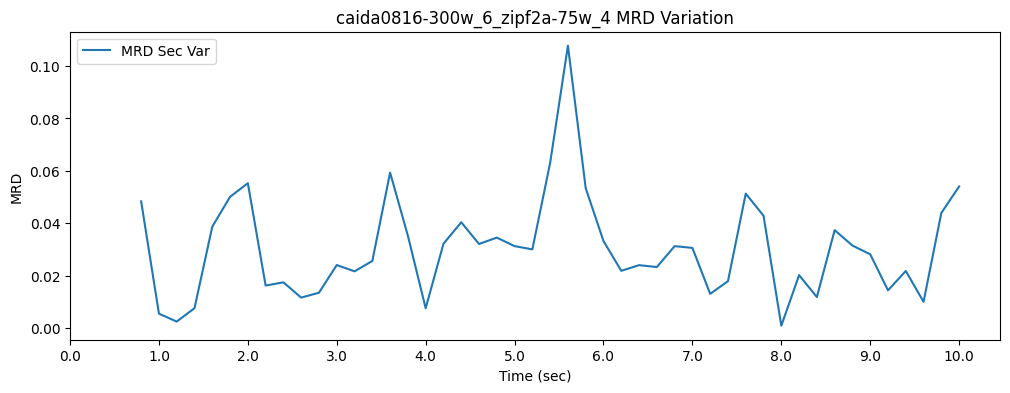

caida0816-300w_6_zipf2a-35w_4
[None, None, None, None, 0.017929285709458676, 0.015333373444625542, 0.0042590667969769624, 0.015550176686042472, 0.007390341489847463, 0.021758143576885713, 0.023045705122297755, 0.027027438821811745, 0.0478003610947248, 0.013542313071847834, 0.02890705353759543, 0.061918856311379666, 0.02578723797211191, 0.006314563712867427, 0.00571792031038576, 0.01935125061030596, 0.00587854217397904, 0.005885003376550957, 0.003038505426850302, 0.003797441314908223, 0.02354431025978676, 0.016471467408810336, 0.022855470685374968, 0.02714279472736636, 0.032407845144400094, 0.009921431294683813, 0.003476790762089621, 0.005351275044841564, 0.007700061871431463, 0.030870417203267886, 0.03519036919086699, 0.00645242290946435, 0.06767093494322812, 0.008304251817760067, 0.002612413143195158, 0.011332411586971292, 0.024093140121489554, 0.002136292550769636, 0.037194252261841365, 0.006274597731021236, 0.028453038204333425, 0.0071122922164746916, 0.03770440368272432, 0.00333755

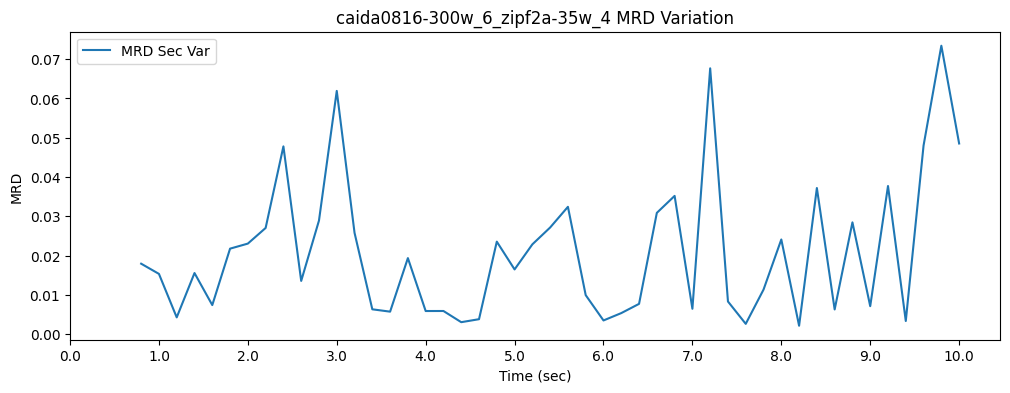

caida0816-150w_6_zipf2a-150w_4
[None, None, None, None, 0.051865379379233356, 0.08793701364499015, 0.02189684224485522, 0.0170402099316507, 0.0078235882824777, 0.000857691497296087, 0.008763424434973355, 0.016338308159300097, 0.008725682275067592, 0.011925983149974617, 0.030998975483913838, 0.03007637194391466, 0.043118194679095556, 0.00861678790805881, 0.00267730702513308, 0.024073828384327478, 0.020341237097822318, 0.05563154376657792, 0.028250313044009434, 0.014992018677368157, 0.013717717197583135, 0.009352024562685468, 0.001064588589739457, 0.008493191710011283, 0.012190134809804742, 0.004945442036757064, 0.027352807000412926, 0.008946443621638822, 0.010808656645331205, 0.025562530389758586, 0.009176773566490048, 0.022160899167570636, 0.009680866424975731, 0.010524946629365706, 0.03602776379056699, 0.00955413488674417, 0.034048040767959864, 0.05872121703895322, 0.02768042575285562, 0.027381104283030977, 0.004043070099014279, 0.051242786939282414, 0.012313603673270002, 0.0075629624

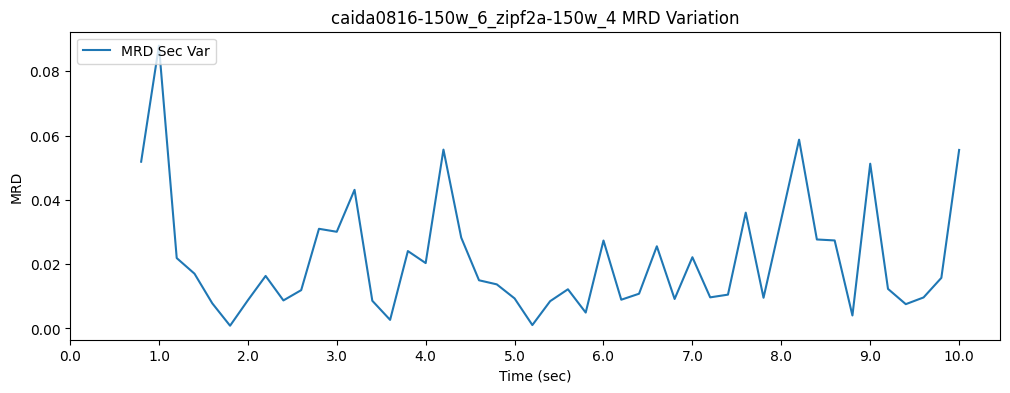

caida0816-150w_6_zipf2a-75w_4
[None, None, None, None, 0.07877128673373407, 0.014660453765941439, 0.014030934067939427, 0.01791546805342631, 0.007715113974848864, 0.00928617330673448, 0.020370618825032105, 0.0026062975422008194, 0.039494430436309125, 0.020946367082528727, 0.007287003745721721, 0.011890514863414692, 0.004670568585437407, 0.01475495574909702, 0.01836303404654982, 0.020397725242438325, 0.08903878006086002, 0.052080991562129975, 0.03168169364607093, 0.008750341810226936, 0.02393437083523231, 7.561635548897216e-05, 0.004615848433230707, 0.04680112139453141, 0.07773166773220458, 0.06936314858553877, 0.00830306175402179, 0.0008802046384612239, 0.011662282786070122, 0.02244436093367902, 0.005975749234051031, 0.03177969618638987, 0.015912212378054902, 0.009851811345067851, 0.017451287340630117, 0.009045669103106335, 0.0009586989907297561, 0.0049362013384690595, 0.007505434640934783, 0.040585125804679545, 0.016367698103049, 0.04259798168419854, 0.04984791564532248, 0.00048814504

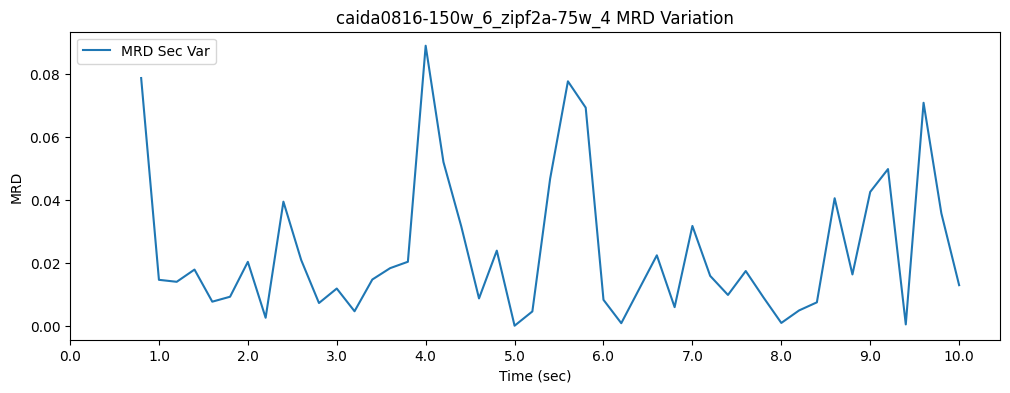

caida0816-150w_6_zipf2a-35w_4
[None, None, None, None, 0.026830847803613167, 0.0011195564221948007, 0.0564387856659061, 0.04088789997880907, 0.022647754582490243, 0.026616052059211692, 0.017746697258015642, 0.003742449758795563, 0.0283552889508919, 0.019391025641025628, 0.04693692585323872, 0.01414550318985286, 0.02482547652933903, 0.030254181397511182, 0.00044267303600104, 0.004625483493026494, 0.03713638466592134, 0.006357300258611143, 0.02025974775182704, 0.025758170063476582, 0.024602587435095524, 0.000625433523829988, 0.0010658544232152178, 0.003812375842439153, 0.004196794858266295, 0.03414115646258503, 0.03289367508326124, 0.006696095366046095, 0.038729722133555244, 0.015021511864639625, 0.022467397774355746, 0.03492828010087007, 0.008088162619839856, 0.0026860623929585437, 0.001964362121733565, 0.008112168382593543, 0.010491975833187506, 0.034377389362478916, 0.01709092253356348, 0.026474309487047487, 0.008820281823574638, 0.020833333333333315, 0.016803275790128802, 0.053704908

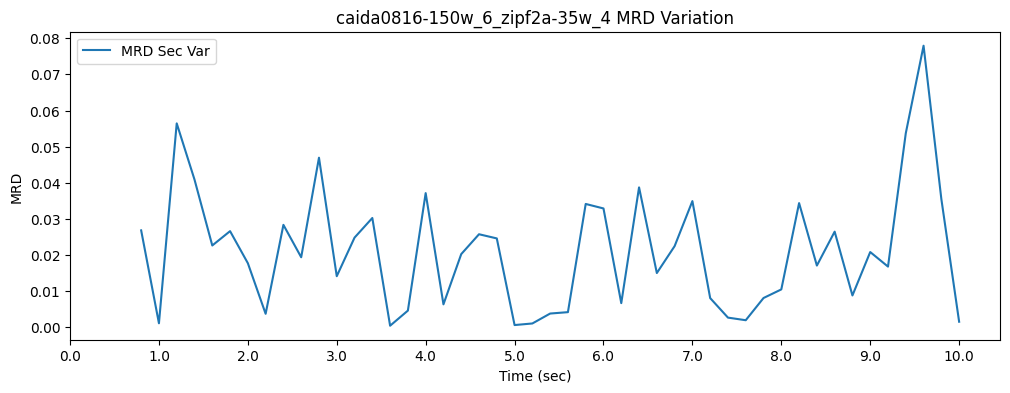

0
caida0517-500w_6_zipf2a-150w_4_4096
	FSD MRD 
		 [None, None, None, None, 0.09197694263769185, 0.0031062466117003362, 0.058357011628039634, 0.002343390650444921, 0.005852341295332797, 0.01367625455915028, 0.025156867865696875, 0.058639703193786974, 0.01739448727192061, 0.05990242111712196, 0.014058810126921562, 0.0073327921625135906, 0.0011671335200746924, 0.009306460160350083, 0.010824943194242542, 0.029141146046005262, 0.02867044605289415, 0.03663712851722145, 0.04943071499106455, 0.04914188249719964, 0.03474986936253155, 0.025236883298053958, 0.048392434743230295, 0.10592270256347691, 0.029776751963176862, 0.015397223532917725, 0.0058768342112202054, 0.03967778685502921, 0.001456944708457808, 0.02689992607333025, 0.010270459491956263, 0.001444180168311604, 0.007371311267415082, 0.012896745085654193, 0.028511935211063544, 0.02976584006603844, 0.006795198002690683, 0.014911507974263105, 0.02901410085301448, 0.03743580177827521, 0.04998408061293835, 0.02269404426142063, 0.08605110308

In [48]:
predict(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)